In [1]:
# IMPLEMENTING A HYBRID DEEP LEARNING MODEL

In [3]:
# IMPORT THE LIBRARIES
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
# IMPORT THE DATASET
dataset = pd.read_csv("Credit_Card_Applications.csv")
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [5]:
# print(X, y)

In [6]:
# FEATURE SCALING - USE NORMALIZATION

from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
X = sc.fit_transform(X)

# print(X)

In [9]:
# IMPLEMENT THE SELF ORGANIZING MAP USING MINISOM

from minisom import MiniSom
SOM = MiniSom(x = 10, y = 10, input_len = 15, sigma = 1.0, learning_rate = 0.5)

# Initialise the weights
SOM.random_weights_init(X)

# Train the SOM
SOM.train_random(data = X, num_iteration = 100)

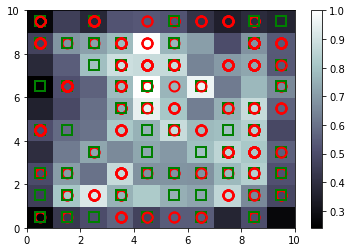

In [10]:
# VISUALIZING THE RESULTS -> WILL CONTAIN THE WINNING NODE WITH THE MEAN INTERNEURON DISTANCES
from pylab import bone, pcolor, colorbar, plot, show

# Initialise the Window
bone()

# To get MIDs, use the distance_map method and transpose the matrix
pcolor(SOM.distance_map().T)

# Add Legend - High MID corresponds to white color
colorbar()

markers = ['o', 's']
colors = ['r', 'g']
for i, x in enumerate(X):
    w = SOM.winner(x)
    plot(w[0] + 0.5,
         w[1] + 0.5,
         markers[y[i]],
         markeredgecolor = colors[y[i]],
         markerfacecolor = 'None',
         markersize = 10,
         markeredgewidth = 2)

show()

In [11]:
# FINDING THE FRAUDS

mappings = SOM.win_map(X)
frauds = np.concatenate((mappings[(4, 8)], mappings[(4, 6)], mappings[(2, 1)], mappings[(6, 6)]), axis = 0)
frauds = sc.inverse_transform(frauds)

In [12]:
# PRINTING THE FRAUD CLIENTS

print('Fraud Customer IDs')
for i in frauds[:, 0]:
  print(int(i))

Fraud Customer IDs
15761158
15761733
15766734
15785339
15678210
15664615
15607986
15716276
15578722
15762392
15591107
15767264
15761854
15815040
15788442
15633944
15801072
15573798
15647295
15803378
15714087
15730793
15788776
15746995
15764444
15731989
15771409
15777893


In [13]:
# PART 2 - GOING FROM UNSUPERVISED TO SUPERVISED DEEP LEARNING

In [14]:
# Create Matrix of Features

customers = dataset.iloc[:, 1:].values

In [15]:
# Create the Dependent Variable

is_fraud = np.zeros(len(dataset))
for i in range(len(dataset)):
    if dataset.iloc[i, 0] in frauds:
        is_fraud[i] = 1
        
# print(is_fraud)

In [16]:
# PART 3 - ARTIFICIAL NEURAL NETWORK

In [17]:
# Feature Scaling

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
customers = sc.fit_transform(customers)

# print(customers)

In [18]:
# Building the ANN

In [19]:
# Import tensorflow
import tensorflow as tf

# Initialize the ANN
ANN = tf.keras.models.Sequential()

In [21]:
# Adding the Input Layer and first Hidden Layer
ANN.add(tf.keras.layers.Dense(units = 2, activation = 'relu', kernel_initializer = 'uniform', input_dim = 15))

In [22]:
# Adding the Output Layer
ANN.add(tf.keras.layers.Dense(units = 1, activation = 'sigmoid', kernel_initializer = 'uniform'))

In [23]:
# Compiling the ANN
ANN.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [24]:
# Training the ANN on the Training set
ANN.fit(customers, is_fraud, batch_size = 1, epochs = 10)

Epoch 1/10
690/690 [==============================] - 2s 2ms/step - loss: 0.4632 - accuracy: 0.9551
Epoch 2/10
690/690 [==============================] - 2s 3ms/step - loss: 0.2162 - accuracy: 0.9594
Epoch 3/10
690/690 [==============================] - 2s 3ms/step - loss: 0.1814 - accuracy: 0.9594
Epoch 4/10
690/690 [==============================] - 2s 3ms/step - loss: 0.1695 - accuracy: 0.9594
Epoch 5/10
690/690 [==============================] - 2s 3ms/step - loss: 0.1639 - accuracy: 0.9594
Epoch 6/10
690/690 [==============================] - 2s 4ms/step - loss: 0.1593 - accuracy: 0.9594
Epoch 7/10
690/690 [==============================] - 2s 3ms/step - loss: 0.1556 - accuracy: 0.9594
Epoch 8/10
690/690 [==============================] - 2s 3ms/step - loss: 0.1535 - accuracy: 0.9594
Epoch 9/10
690/690 [==============================] - 2s 3ms/step - loss: 0.1519 - accuracy: 0.9594
Epoch 10/10
690/690 [==============================] - 2s 3ms/step - loss: 0.1503 - accuracy: 0.9594

In [27]:
# Predicting the Probabilites of Frauds
y_pred = ANN.predict(customers)

# Concatenate Customer IDs with their probabilities
y_pred = np.concatenate((dataset.iloc[:, 0:1].values, y_pred), axis = 1)

# Sort the predictions according to probabilities
y_pred = y_pred[y_pred[:, 1].argsort()]

In [30]:
# Print table of probabilities
dataframe = pd.DataFrame(y_pred, columns = ['ID', 'Probability'], index = list(range(1, len(y_pred) + 1)))

dataframe

,ID,Probability
1,15645820.0,0.000456
2,15802869.0,0.000631
3,15686461.0,0.000725
4,15665014.0,0.000730
5,15654625.0,0.000864
...,...,...
686,15708714.0,0.119050
687,15642098.0,0.119050
688,15598802.0,0.119050
689,15566495.0,0.119050
